In [440]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [441]:
data_2017 = os.path.join("Resources", "2017.csv")
cost_of_living = os.path.join("Resources", "cost_of_living.csv")
physician_data = os.path.join("Resources", "physician_data.csv")

In [442]:
data_2017 = pd.read_csv(data_2017)
cost_of_living = pd.read_csv(cost_of_living)
physician_data = pd.read_csv(physician_data)

In [443]:
physician_data = physician_data.rename(columns={"Location":"State", "Primary Care Physicians": "primary_care_physicians", "Specialist Physicians": "specialist_physicians", "Total": "total"})

In [444]:
physician_data.head()

,State,primary_care_physicians,specialist_physicians,total
0,United States,479856.0,525439.0,1005295.0
1,Alabama,5863.0,6342.0,12205.0
2,Alaska,1054.0,846.0,1900.0
3,Arizona,8537.0,9269.0,17806.0
4,Arkansas,3513.0,3637.0,7150.0


In [445]:
cost_of_living.head()

,costIndex,State,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,1,Mississippi,86.1,91.6,70.1,89.1,89.2,91.4
1,2,Arkansas,86.9,92.0,73.9,91.8,83.6,85.6
2,3,Oklahoma,87.0,95.4,71.9,94.1,89.5,93.2
3,4,Missouri,87.1,96.6,70.6,99.6,87.3,95.7
4,5,New Mexico,87.5,100.9,77.7,87.9,91.6,100.1


In [446]:
us_state_abbrev = [{
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}]

In [447]:
us_state_abbrev = pd.DataFrame(us_state_abbrev).T

In [448]:
us_state_abbrev = us_state_abbrev.reset_index(level=0)

In [449]:
us_state_abbrev = us_state_abbrev.rename(columns={"index": "State"})

In [450]:
us_state_abbrev.head()

,State,0
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [451]:
new = pd.merge(cost_of_living, us_state_abbrev, on="State")
physician_data = pd.merge(physician_data, us_state_abbrev, on="State" )

In [452]:
physician_data = physician_data.rename(columns={0:"provider_state"})

In [453]:
new = new.rename(columns={0:"provider_state"})

In [454]:
new.head()

,costIndex,State,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,provider_state
0,1,Mississippi,86.1,91.6,70.1,89.1,89.2,91.4,MS
1,2,Arkansas,86.9,92.0,73.9,91.8,83.6,85.6,AR
2,3,Oklahoma,87.0,95.4,71.9,94.1,89.5,93.2,OK
3,4,Missouri,87.1,96.6,70.6,99.6,87.3,95.7,MO
4,5,New Mexico,87.5,100.9,77.7,87.9,91.6,100.1,NM


In [455]:
data_2017.columns = data_2017.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [456]:
data_2017

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_hrr_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.79,25823.71,24057.39
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56,20688.34,19791.41
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.55,11811.18,8194.36
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33,19134.00,18154.00
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47,8519.47,6714.88
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,41,41130.56,5925.95,4808.00
6,054 - NERVOUS SYSTEM NEOPLASMS W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,14,31897.86,6849.79,6195.79
7,056 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,21,43028.05,9857.05,8936.71
8,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,47,25434.17,6124.51,4936.53
9,"062 - ISCHEMIC STROKE, PRECEREBRAL OCCLUSION O...",10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,59503.82,10002.00,8773.29


In [457]:
data_2017 = data_2017[["provider_state", "provider_name", "total_discharges", "average_covered_charges", "average_total_payments", "average_medicare_payments"]]

In [458]:
data_2017_raw = data_2017[["provider_state", "provider_name", "total_discharges", "average_covered_charges", "average_total_payments", "average_medicare_payments"]]

In [459]:
data_2017["average_consumer_payments"] = data_2017["average_total_payments"] - data_2017["average_medicare_payments"]

C:\Users\natha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [460]:
data_2017.head()

,provider_state,provider_name,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments
0,AL,SOUTHEAST ALABAMA MEDICAL CENTER,28,117117.79,25823.71,24057.39,1766.32
1,AL,SOUTHEAST ALABAMA MEDICAL CENTER,32,98357.56,20688.34,19791.41,896.93
2,AL,SOUTHEAST ALABAMA MEDICAL CENTER,11,69153.55,11811.18,8194.36,3616.82
3,AL,SOUTHEAST ALABAMA MEDICAL CENTER,12,100427.33,19134.00,18154.00,980.00
4,AL,SOUTHEAST ALABAMA MEDICAL CENTER,17,58199.47,8519.47,6714.88,1804.59


In [461]:
state_grouped = data_2017.groupby("provider_state").sum()

In [462]:
state_grouped["per_capita_average_total_payments"] = state_grouped["average_total_payments"]/state_grouped["total_discharges"]
state_grouped["per capita average medicare payments"] = state_grouped["average_medicare_payments"]/state_grouped["total_discharges"]
state_grouped["per capita average consumer payments"] = state_grouped["average_consumer_payments"]/state_grouped["total_discharges"]

In [463]:
state_total_payments_grouped = state_grouped["per_capita_average_total_payments"].reset_index()

In [464]:
state_total_payments_grouped = state_total_payments_grouped.sort_values("per_capita_average_total_payments", ascending=False)

In [465]:
state_total_payments_grouped.head()

,provider_state,per_capita_average_total_payments
0,AK,742.757479
11,HI,629.444775
7,DC,569.416996
4,CA,527.639260
37,OR,526.075845


In [466]:
names = []
for name in state_total_payments_grouped["provider_state"]: 
    names.append(name)

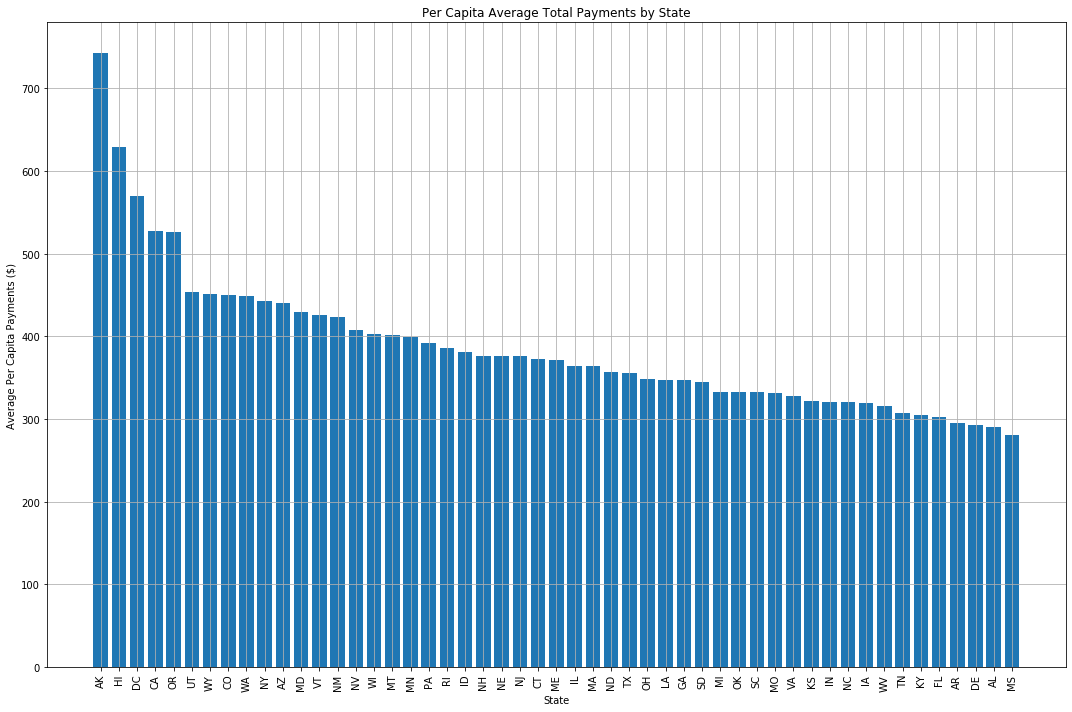

In [467]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(state_total_payments_grouped["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, state_total_payments_grouped["per_capita_average_total_payments"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Payments ($)")
plt.title("Per Capita Average Total Payments by State")
plt.tight_layout()
# plt.savefig("Per Capita Average Total Payments by State")

In [468]:
comparison = pd.merge(state_total_payments_grouped, new, on="provider_state")

In [469]:
comparison.head()

,provider_state,per_capita_average_total_payments,costIndex,State,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,AK,742.757479,45,Alaska,129.9,134.2,133.9,154.2,130.8,150.9
1,HI,629.444775,51,Hawaii,192.9,169.3,318.6,172.7,148.6,116.8
2,DC,569.416996,50,District of Columbia,158.4,115.5,267.0,119.7,116.6,97.3
3,CA,527.639260,49,California,151.7,121.4,227.3,117.7,138.9,114.5
4,OR,526.075845,47,Oregon,134.2,110.3,181.8,88.0,136.7,113.2


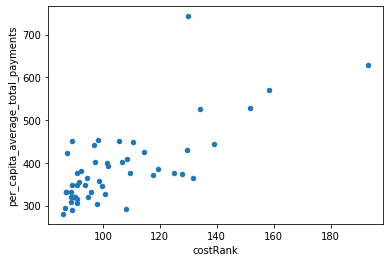

In [470]:
comparison.plot.scatter("costRank", "per_capita_average_total_payments")
# plt.savefig("Cost of Living vs Per Capita Average Total Payments")

In [471]:
x = comparison[["per_capita_average_total_payments", "costRank"]]

In [472]:
corr = x.corr()
corr

,per_capita_average_total_payments,costRank
per_capita_average_total_payments,1.000000,0.721119
costRank,0.721119,1.000000


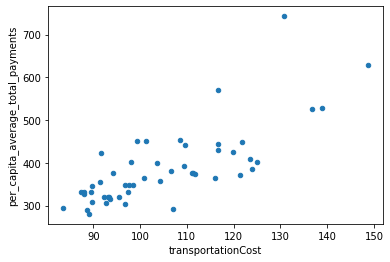

In [473]:
comparison.plot.scatter("transportationCost", "per_capita_average_total_payments")
# plt.savefig("Transportation Cost vs Per Capita Average Total Payments")

In [474]:
x = comparison[["per_capita_average_total_payments", "transportationCost"]]
corr = x.corr()
corr

,per_capita_average_total_payments,transportationCost
per_capita_average_total_payments,1.000000,0.759425
transportationCost,0.759425,1.000000


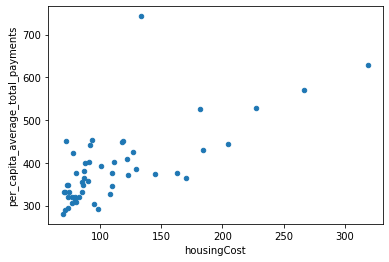

In [475]:
comparison.plot.scatter("housingCost", "per_capita_average_total_payments")
# plt.savefig("Housing Cost vs Per Capita Average Total Payments")

In [476]:
x = comparison[["per_capita_average_total_payments", "housingCost"]]
corr = x.corr()
corr

,per_capita_average_total_payments,housingCost
per_capita_average_total_payments,1.000000,0.683755
housingCost,0.683755,1.000000


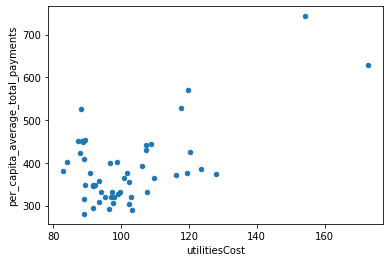

In [477]:
comparison.plot.scatter("utilitiesCost", "per_capita_average_total_payments")
# plt.savefig("Utilities Cost vs Per Capita Average Total Payments")

In [478]:
x = comparison[["per_capita_average_total_payments", "utilitiesCost"]]
corr = x.corr()
corr

,per_capita_average_total_payments,utilitiesCost
per_capita_average_total_payments,1.000000,0.592472
utilitiesCost,0.592472,1.000000


    *Observations:
    *Alaska, Hawaii, District of Columbia, California and Oregon pay most in per capita total health payments for sample group.
    *Mississippi, ALabama and Delware spend the lest per capita
    * Alaska(most:$742 spends $480 more than Mississippi (lest:$280))

In [479]:
state_medicare_grouped = state_grouped["per capita average medicare payments"].reset_index()

In [480]:
state_medicare_grouped = state_medicare_grouped.sort_values("per capita average medicare payments", ascending=False)

In [481]:
state_medicare_grouped.head()

,provider_state,per capita average medicare payments
0,AK,650.470138
11,HI,495.098695
4,CA,464.321545
37,OR,452.760314
7,DC,435.275106


In [482]:
names = []
for name in state_medicare_grouped["provider_state"]: 
    names.append(name)

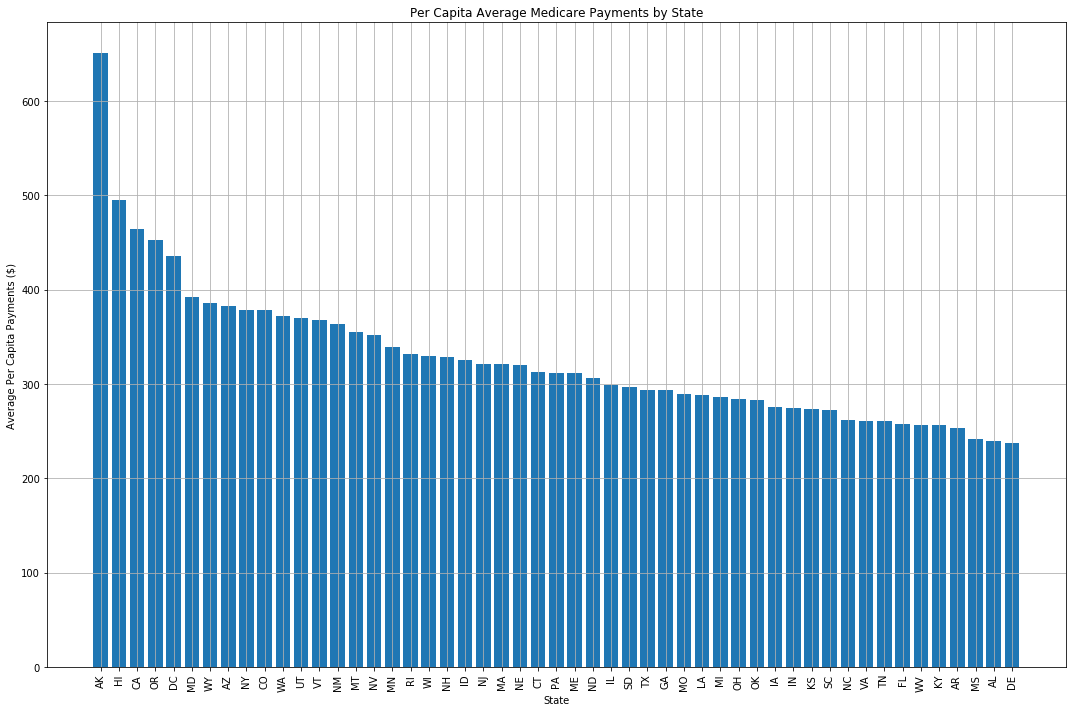

In [483]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(state_medicare_grouped["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, state_medicare_grouped["per capita average medicare payments"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Payments ($)")
plt.title("Per Capita Average Medicare Payments by State")
plt.tight_layout()
# plt.savefig("Per Capita Average Medicare Payments by State")

In [484]:
state_consumer_payment_grouped = state_grouped["per capita average consumer payments"].reset_index()

In [485]:
state_consumer_payment_grouped = state_consumer_payment_grouped.sort_values("per capita average consumer payments", ascending=False)

In [486]:
state_consumer_payment_grouped.head()

,provider_state,per capita average consumer payments
11,HI,134.346081
7,DC,134.141889
0,AK,92.287341
44,UT,83.676189
38,PA,80.520042


In [487]:
names = []
for name in state_consumer_payment_grouped["provider_state"]: 
    names.append(name)

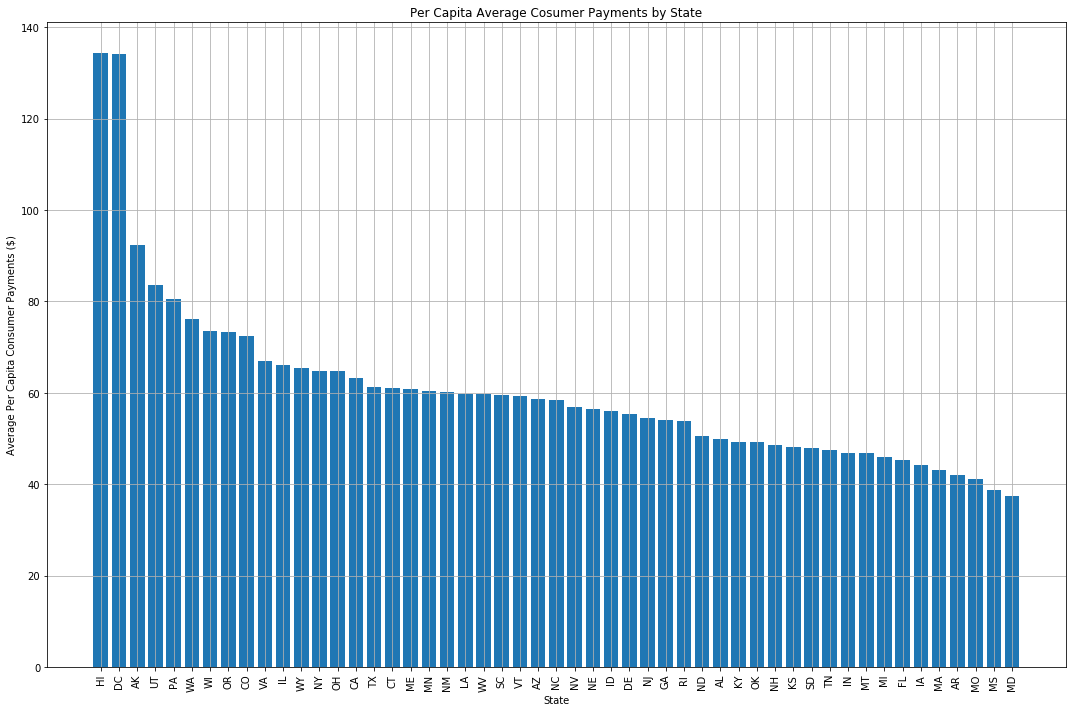

In [488]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(state_consumer_payment_grouped["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, state_consumer_payment_grouped["per capita average consumer payments"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Consumer Payments ($)")
plt.title("Per Capita Average Cosumer Payments by State")
plt.tight_layout()
# plt.savefig("Per Capita Average Consumer Payments by State")

In [489]:
provider_name_grouped = data_2017.groupby("provider_name").sum()

In [490]:
provider_name_grouped.head()

,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments
provider_name,,,,,
ABBEVILLE GENERAL HOSPITAL,299,343081.44,108849.95,94973.98,13875.97
ABBOTT NORTHWESTERN HOSPITAL,11667,15208635.72,4308641.94,3864361.89,444280.05
ABILENE REGIONAL MEDICAL CENTER,1374,3786717.62,454610.80,392648.76,61962.04
ABINGTON MEMORIAL HOSPITAL,8433,12997767.53,2977841.70,2426369.23,551472.47
ABRAZO ARROWHEAD CAMPUS,2923,8671824.96,1613372.12,1479389.00,133983.12


In [491]:
provider_name_grouped["per_capita_average_total_payments"] = provider_name_grouped["average_total_payments"]/provider_name_grouped["total_discharges"]
provider_name_grouped["per capita average medicare payments"] = provider_name_grouped["average_medicare_payments"]/provider_name_grouped["total_discharges"]
provider_name_grouped["per capita average consumer payments"] = provider_name_grouped["average_consumer_payments"]/provider_name_grouped["total_discharges"]

In [492]:
provider_name_grouped.head()

,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,per_capita_average_total_payments,per capita average medicare payments,per capita average consumer payments
provider_name,,,,,,,,
ABBEVILLE GENERAL HOSPITAL,299,343081.44,108849.95,94973.98,13875.97,364.046656,317.638729,46.407926
ABBOTT NORTHWESTERN HOSPITAL,11667,15208635.72,4308641.94,3864361.89,444280.05,369.301615,331.221556,38.080059
ABILENE REGIONAL MEDICAL CENTER,1374,3786717.62,454610.80,392648.76,61962.04,330.866667,285.770568,45.096099
ABINGTON MEMORIAL HOSPITAL,8433,12997767.53,2977841.70,2426369.23,551472.47,353.117716,287.723139,65.394577
ABRAZO ARROWHEAD CAMPUS,2923,8671824.96,1613372.12,1479389.00,133983.12,551.957619,506.120082,45.837537


In [493]:
provider_average_total_payments = provider_name_grouped["per_capita_average_total_payments"].reset_index()

In [494]:
provider_average_total_payments = provider_average_total_payments.sort_values("per_capita_average_total_payments", ascending=False).head(n=20)

In [495]:
provider_average_total_payments.head()

,provider_name,per_capita_average_total_payments
3056,"WOMANS HOSPITAL OF TEXAS,THE",5444.462727
2901,US PAIN & SPINE HOSPITAL,3140.177826
2594,STERLING SURGICAL HOSPITAL,3116.968824
1200,KAISER FOUNDATION HOSPITAL - SAN FRANCISCO,2571.798500
1655,MINIMALLY INVASIVE SURGERY HOSPITAL,2479.228056


In [496]:
names = []
for name in provider_average_total_payments["provider_name"]: 
    names.append(name)

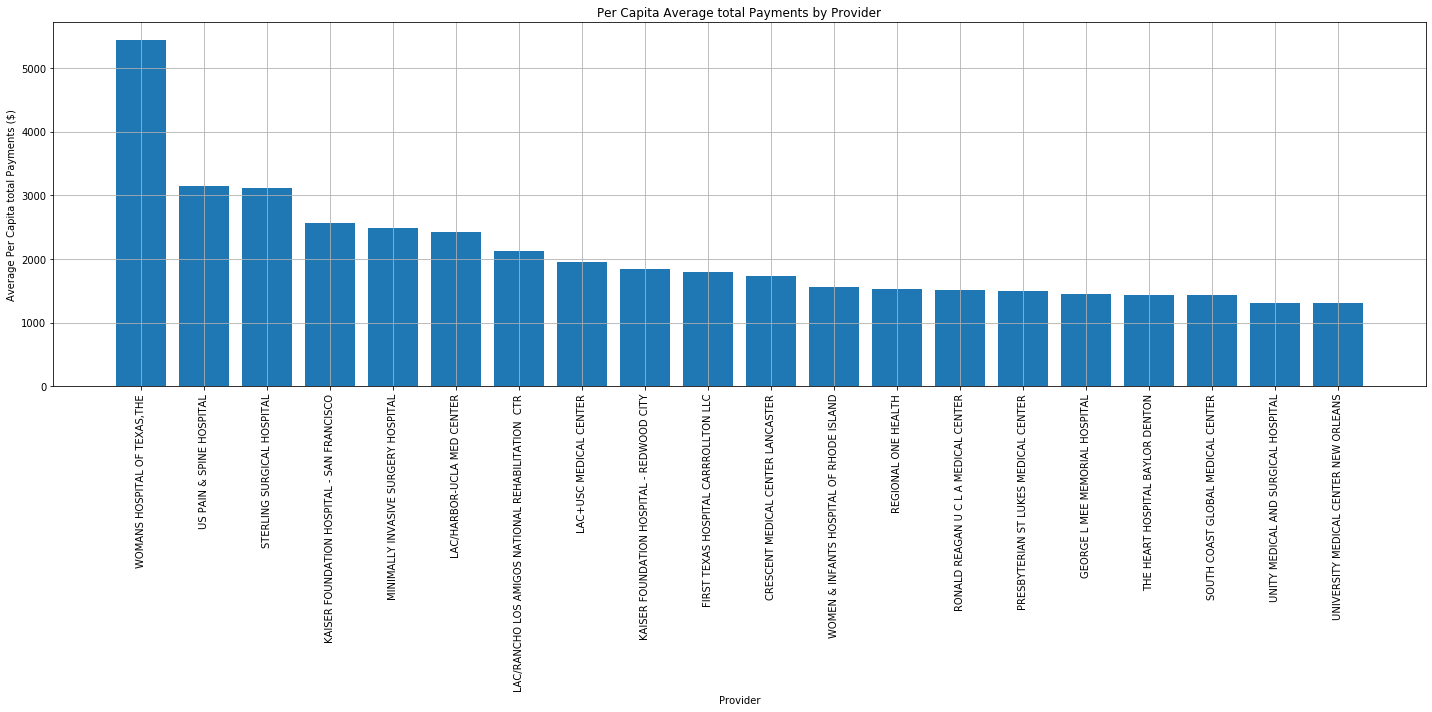

In [497]:
plt.figure(figsize=(20,10))
x_axis = np.arange(len(provider_average_total_payments["provider_name"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, provider_average_total_payments["per_capita_average_total_payments"])
plt.grid()
plt.xlabel("Provider")
plt.ylabel("Average Per Capita total Payments ($)")
plt.title("Per Capita Average total Payments by Provider")
plt.tight_layout()
# plt.savefig("Per Capita Average total Payments by Provider")

In [498]:
average_covered_charges = data_2017.groupby("provider_state").sum()

In [499]:
average_covered_charges["per capita average covered charges"] = average_covered_charges["average_covered_charges"]/average_covered_charges["total_discharges"] 

In [500]:
average_covered_charges = average_covered_charges["per capita average covered charges"].reset_index()

In [501]:
average_covered_charges = average_covered_charges.sort_values("per capita average covered charges", ascending=False)

In [502]:
average_covered_charges.head()

,provider_state,per capita average covered charges
4,CA,3048.361998
0,AK,3043.830371
33,NV,2838.785136
5,CO,2459.717892
31,NJ,2288.516268


In [503]:
names = []
for name in average_covered_charges["provider_state"]: 
    names.append(name)

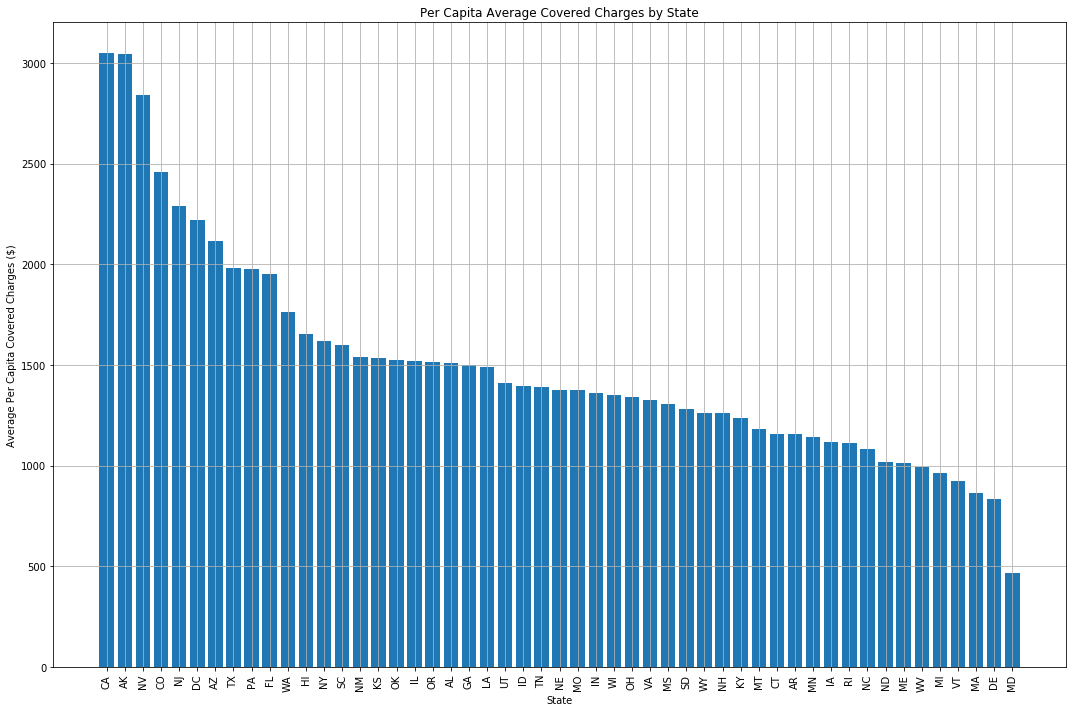

In [504]:
plt.figure(figsize=(15,10))
x_axis = np.arange(len(average_covered_charges["provider_state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, average_covered_charges["per capita average covered charges"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Average Per Capita Covered Charges ($)")
plt.title("Per Capita Average Covered Charges by State")
plt.tight_layout()
# plt.savefig("Per Capita Average Covered Charges by State")

*Observation:
*For some reason Maryland has a relatively high total and medicare payments, but low on consumer payment and averge covered charge.

In [505]:
data_2017_raw.head()

,provider_state,provider_name,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,AL,SOUTHEAST ALABAMA MEDICAL CENTER,28,117117.79,25823.71,24057.39
1,AL,SOUTHEAST ALABAMA MEDICAL CENTER,32,98357.56,20688.34,19791.41
2,AL,SOUTHEAST ALABAMA MEDICAL CENTER,11,69153.55,11811.18,8194.36
3,AL,SOUTHEAST ALABAMA MEDICAL CENTER,12,100427.33,19134.00,18154.00
4,AL,SOUTHEAST ALABAMA MEDICAL CENTER,17,58199.47,8519.47,6714.88


In [506]:
market_share = data_2017_raw.groupby(["provider_state", "provider_name"]).sum()

In [507]:
market_share = market_share.reset_index()

In [508]:
market_share.head()

,provider_state,provider_name,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,AK,ALASKA NATIVE MEDICAL CENTER,924,2445600.12,727963.76,686213.68
1,AK,ALASKA REGIONAL HOSPITAL,1317,4425897.89,775992.01,649633.48
2,AK,BARTLETT REGIONAL HOSPITAL,238,401616.35,212352.76,198250.18
3,AK,CENTRAL PENINSULA GENERAL HOSPITAL,414,640567.78,288606.46,270462.71
4,AK,FAIRBANKS MEMORIAL HOSPITAL,541,984926.24,436002.53,400349.35


In [509]:
number_state_hospitals = []
provider_state_count = market_share["provider_state"][0]
state_abbrevs = [provider_state_count]
x = 1
provider_name_count = 0

for row in market_share["provider_state"]:
    if row == provider_state_count:
        provider_state_count = row
        provider_name_count += 1
        
    else:
        number_state_hospitals.append(provider_name_count)
        provider_state_count = row
        provider_name_count = 1
        state_abbrevs.append(row)
number_state_hospitals.append(provider_name_count)
state_abbrevs.append(row)

In [510]:
number_state_hospitals = zip(state_abbrevs, number_state_hospitals)

In [511]:
number_state_hospitals = pd.DataFrame(number_state_hospitals)

In [512]:
number_state_hospitals = number_state_hospitals.rename(columns = ({0: "provider_state", 1: "number_of_hospitals"}))

In [522]:
number_state_hospitals.head()

,provider_state,number_of_hospitals
0,AK,8
1,AL,82
2,AR,44
3,AZ,59
4,CA,288


In [523]:
market_share = market_share.groupby("provider_state").sum().reset_index()

In [524]:
market_share.head()

,provider_state,per_capita_average_total_payments,total_discharges,average_total_payments,number_of_hospitals
0,AK,742.757479,7681,5.705120e+06,8
1,AL,289.991599,142060,4.119621e+07,82
2,AR,295.446526,91655,2.707915e+07,44
3,AZ,440.873251,115039,5.071762e+07,59
4,CA,527.639260,531134,2.802472e+08,288


In [525]:
market_share = market_share[["provider_state", "total_discharges", "average_total_payments"]]

In [526]:
market_share = pd.merge(state_total_payments_grouped, market_share, on="provider_state")

In [527]:
market_share = pd.merge(market_share, number_state_hospitals, on="provider_state")

In [528]:
market_share.head()

,provider_state,per_capita_average_total_payments,total_discharges,average_total_payments,number_of_hospitals
0,AK,742.757479,7681,5.705120e+06,8
1,HI,629.444775,13742,8.649830e+06,12
2,DC,569.416996,27599,1.571534e+07,7
3,CA,527.639260,531134,2.802472e+08,288
4,OR,526.075845,53440,2.811349e+07,34


In [529]:
market_share = market_share.sort_values("number_of_hospitals", ascending=False)

In [530]:
market_share.head()

,provider_state,per_capita_average_total_payments,total_discharges,average_total_payments,number_of_hospitals
3,CA,527.639260,531134,2.802472e+08,288
29,TX,355.205014,499356,1.773738e+08,279
46,FL,302.967838,582437,1.764597e+08,166
18,PA,391.829753,324956,1.273274e+08,148
9,NY,443.239158,428911,1.901102e+08,145


In [531]:
market_share["total_discharges_per_hospital"] = market_share["total_discharges"]/market_share["number_of_hospitals"]

In [532]:
market_share_discharges = market_share.sort_values("total_discharges_per_hospital", ascending=False)

In [533]:
market_share_discharges  = market_share_discharges [["provider_state", "total_discharges_per_hospital", "per_capita_average_total_payments"]]

In [534]:
market_share_discharges.head()

,provider_state,total_discharges_per_hospital,per_capita_average_total_payments
48,DE,5910.000000,293.054141
27,MA,4030.250000,363.988061
11,MD,3948.148936,429.937762
2,DC,3942.714286,569.416996
23,NJ,3890.640625,375.711545


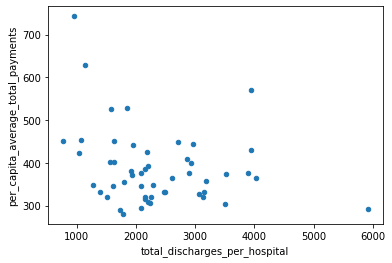

In [535]:
market_share_discharges.plot.scatter("total_discharges_per_hospital", "per_capita_average_total_payments")

In [536]:
x = market_share_discharges[["total_discharges_per_hospital", "per_capita_average_total_payments"]]
corr = x.corr()
corr

,total_discharges_per_hospital,per_capita_average_total_payments
total_discharges_per_hospital,1.000000,-0.264992
per_capita_average_total_payments,-0.264992,1.000000


In [537]:
market_share_discharges = pd.merge(market_share_discharges, state_consumer_payment_grouped, on="provider_state")

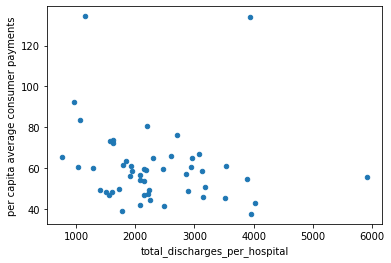

In [538]:
market_share_discharges.plot.scatter("total_discharges_per_hospital", "per capita average consumer payments")

In [539]:
x = market_share_discharges[["total_discharges_per_hospital", "per capita average consumer payments"]]
corr = x.corr()
corr

,total_discharges_per_hospital,per capita average consumer payments
total_discharges_per_hospital,1.000000,-0.146403
per capita average consumer payments,-0.146403,1.000000


In [540]:
covered_charge = pd.merge(state_consumer_payment_grouped, average_covered_charges, on="provider_state")

In [541]:
covered_charge.head()

,provider_state,per capita average consumer payments,per capita average covered charges
0,HI,134.346081,1654.204170
1,DC,134.141889,2217.923143
2,AK,92.287341,3043.830371
3,UT,83.676189,1411.642478
4,PA,80.520042,1976.144690


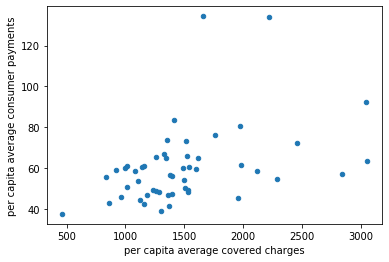

In [542]:
covered_charge.plot.scatter("per capita average covered charges", "per capita average consumer payments")

In [543]:
x = covered_charge[["per capita average covered charges", "per capita average consumer payments"]]
corr = x.corr()
corr

,per capita average covered charges,per capita average consumer payments
per capita average covered charges,1.000000,0.411455
per capita average consumer payments,0.411455,1.000000


In [544]:
physician_data.head()

,State,primary_care_physicians,specialist_physicians,total,provider_state
0,Alabama,5863.0,6342.0,12205.0,AL
1,Alaska,1054.0,846.0,1900.0,AK
2,Arizona,8537.0,9269.0,17806.0,AZ
3,Arkansas,3513.0,3637.0,7150.0,AR
4,California,54135.0,58771.0,112906.0,CA


In [575]:
data_grouped = data_2017_raw.groupby("provider_state").sum()

In [576]:
physician_number_raw = pd.merge(data_grouped, physician_data, on="provider_state")

In [577]:
physician_number_raw = pd.merge(physician_number_raw, state_total_payments_grouped, on="provider_state")

In [578]:
physician_number_raw.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,primary_care_physicians,specialist_physicians,total,per_capita_average_total_payments
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,Alaska,1054.0,846.0,1900.0,742.757479
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,Alabama,5863.0,6342.0,12205.0,289.991599
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,Arkansas,3513.0,3637.0,7150.0,295.446526
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,Arizona,8537.0,9269.0,17806.0,440.873251
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,54135.0,58771.0,112906.0,527.639260


In [564]:
# physician_number = pd.merge(states_total_payments_grouped, physician_number, on="provider_state")

In [579]:
physician_number_raw.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,primary_care_physicians,specialist_physicians,total,per_capita_average_total_payments
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,Alaska,1054.0,846.0,1900.0,742.757479
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,Alabama,5863.0,6342.0,12205.0,289.991599
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,Arkansas,3513.0,3637.0,7150.0,295.446526
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,Arizona,8537.0,9269.0,17806.0,440.873251
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,54135.0,58771.0,112906.0,527.639260


In [590]:
physician_number_raw["per_capita_specialist_physicians"] = physician_number_raw["specialist_physicians"]/physician_number_raw["total_discharges"]
physician_number_raw["per_capita_total_physicians"] = physician_number_raw["total"]/physician_number_raw["total_discharges"]
physician_number_raw["per_capita_primary_care_physicians"] = physician_number_raw["primary_care_physicians"]/physician_number_raw["total_discharges"]

In [591]:
physician_number_raw.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,primary_care_physicians,specialist_physicians,total,per_capita_average_total_payments,per_capita_specialist_physicians,per_capita_total_physicians,per_capita_primary_care_physicians
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,Alaska,1054.0,846.0,1900.0,742.757479,0.110142,0.247364,0.137222
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,Alabama,5863.0,6342.0,12205.0,289.991599,0.044643,0.085914,0.041271
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,Arkansas,3513.0,3637.0,7150.0,295.446526,0.039681,0.078010,0.038329
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,Arizona,8537.0,9269.0,17806.0,440.873251,0.080573,0.154782,0.074210
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,54135.0,58771.0,112906.0,527.639260,0.110652,0.212575,0.101923


In [613]:
physician_number_raw.sort_values("per_capita_total_physicians", ascending=False).head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,State,primary_care_physicians,specialist_physicians,total,per_capita_average_total_payments,per_capita_specialist_physicians,per_capita_total_physicians,per_capita_primary_care_physicians
11,HI,13742,2.273207e+07,8.649830e+06,6.803646e+06,Hawaii,1856.0,1804.0,3660.0,629.444775,0.131276,0.266337,0.135060
7,DC,27599,6.121246e+07,1.571534e+07,1.201316e+07,District of Columbia,3176.0,4170.0,7346.0,569.416996,0.151092,0.266169,0.115077
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,Alaska,1054.0,846.0,1900.0,742.757479,0.110142,0.247364,0.137222
37,OR,53440,8.106697e+07,2.811349e+07,2.419551e+07,Oregon,5987.0,6162.0,12149.0,526.075845,0.115307,0.227339,0.112032
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,California,54135.0,58771.0,112906.0,527.639260,0.110652,0.212575,0.101923


In [592]:
physician_number = physician_number_raw[["provider_state", "per_capita_average_total_payments", "total"]]

In [593]:
physician_number.head()

,provider_state,per_capita_average_total_payments,total
0,AK,742.757479,1900.0
1,AL,289.991599,12205.0
2,AR,295.446526,7150.0
3,AZ,440.873251,17806.0
4,CA,527.639260,112906.0


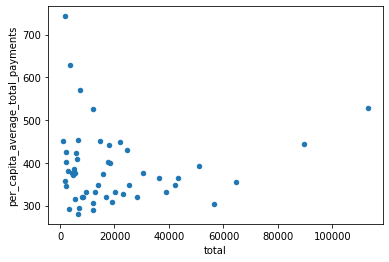

In [594]:
physician_number.plot.scatter("total", "per_capita_average_total_payments")

In [595]:
x = physician_number[["total", "per_capita_average_total_payments"]]
corr = x.corr()
corr

,total,per_capita_average_total_payments
total,1.000000,0.026085
per_capita_average_total_payments,0.026085,1.000000


In [596]:
physician_specialist = physician_number_raw[["provider_state", "per_capita_average_total_payments", "per_capita_specialist_physicians"]]

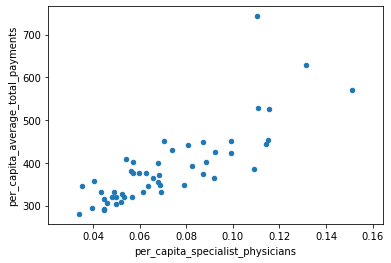

In [597]:
physician_specialist.plot.scatter("per_capita_specialist_physicians", "per_capita_average_total_payments")

In [598]:
x = physician_number_raw[["per_capita_specialist_physicians", "per_capita_average_total_payments"]]
corr = x.corr()
corr

,per_capita_specialist_physicians,per_capita_average_total_payments
per_capita_specialist_physicians,1.000000,0.804764
per_capita_average_total_payments,0.804764,1.000000


In [604]:
physician_total = physician_number_raw[["provider_state", "per_capita_average_total_payments", "per_capita_total_physicians"]]

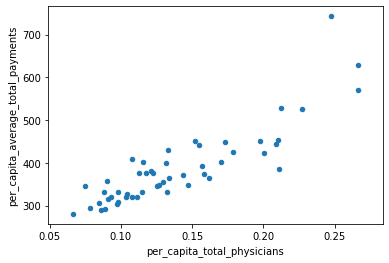

In [605]:
physician_total.plot.scatter("per_capita_total_physicians", "per_capita_average_total_payments")

In [606]:
x = physician_number_raw[["per_capita_total_physicians", "per_capita_average_total_payments"]]
corr = x.corr()
corr

,per_capita_total_physicians,per_capita_average_total_payments
per_capita_total_physicians,1.000000,0.866959
per_capita_average_total_payments,0.866959,1.000000


In [608]:
physician_primary_care = physician_number_raw[["provider_state", "per_capita_average_total_payments", "per_capita_primary_care_physicians"]]

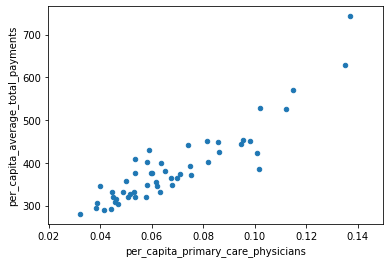

In [610]:
physician_primary_care.plot.scatter("per_capita_primary_care_physicians", "per_capita_average_total_payments")

In [611]:
x = physician_number_raw[["per_capita_total_physicians", "per_capita_average_total_payments"]]
corr = x.corr()
corr

,per_capita_total_physicians,per_capita_average_total_payments
per_capita_total_physicians,1.000000,0.866959
per_capita_average_total_payments,0.866959,1.000000
